## First training neural network to learn y = 2 * x**2

In [47]:
import torch.nn as nn

In [57]:
import torch.optim as optim
import copy 
import tqdm 
import torch 
from sklearn.model_selection import train_test_split

In [50]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.0001)

In [126]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Generate Data
x = np.linspace(-10, 10, 1000).reshape(-1, 1)
y = 2 * x**2  + 3*np.sin(2*np.pi*x/(1e-02)) 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, shuffle=True)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Define Model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        #self.fc = nn.Linear(1, 1)  # Simple linear model (can be modified for non-linearity)
        self.network = nn.Sequential(
            nn.Linear(1,8),
            nn.ReLU(),
            nn.Linear(8,8),
            nn.ReLU(),
            nn.Linear(8,1)
        )
    def forward(self, x):
        return self.network(x)

model = SimpleNN()

# Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training parameters
n_epochs = 100
batch_size = 10
batch_start = torch.arange(0, len(X_train), batch_size)

best_mse = np.inf  # initialize
best_weights = None
history = []

# Training loop
for epoch in range(n_epochs):
    model.train()
    
    with tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
        bar.set_description(f"Epoch {epoch+1}")

        for start in bar:
            X_batch = X_train[start:start + batch_size]
            y_batch = y_train[start:start + batch_size]

            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            bar.set_postfix(mse=float(loss))

    model.eval()
    y_pred = model(X_test)


Epoch 100: 100%|██████████| 70/70 [00:00<00:00, 192.67batch/s, mse=0.484]


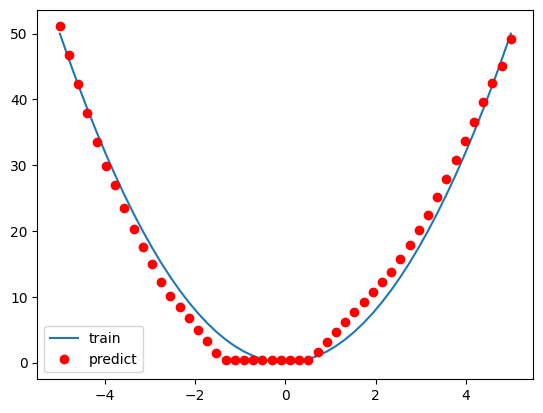

In [127]:
x_new = np.linspace(-5,5).reshape(-1,1)
y = 2*x_new**2
X_new = torch.Tensor(x_new)
y_pred = model(X_new).detach().numpy()

from cProfile import label
import matplotlib.pyplot as plt

plt.plot(x_new,y,label="train")
plt.plot(x_new,y_pred,'ro',label="predict")
plt.legend()